## EXPERIMENT 2.1: AdaFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *


from IPython import embed


In [2]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/ada_2_1/'

### AdaFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

In [3]:
feature_list_children = '../../data/data_full/feature_vectors/adaface_feature_vectors/2.1/similarity_scores_children_bibel_FINAL_INFERENCE_finetuning_2_1_ofsi_final.pt'
feature_list_adults = '../../data/data_full/feature_vectors/adaface_feature_vectors/2.1/similarity_scores_adults_bibel_retina_FINAL_INFERENCE_finetuning_2_1_ofsi_final.pt'


image_names_c, ids_c, num_ids_c, norm_feats_c = load_adaface_vectors(feature_list_children)
image_names_a, ids_a, num_ids_a, norm_feats_a = load_adaface_vectors(feature_list_adults)
# image_names_a, ids_a, num_ids_a, norm_feats_a = load_adaface_vectors_adults(feature_list_adults) # virker for den gamle, men ikke de cropped af en eller anden grund

ids_a = ["_".join(x.split("_")[1:]) for x in ids_a]


# Similarity matrices from adaface - all
sim_mat_c = np.dot(norm_feats_c, norm_feats_c.T)
sim_mat_a = np.dot(norm_feats_a, norm_feats_a.T)


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

# Finding the right threshold

In [4]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()

df_all_threshold_x = compute_metrics_ex_1_1(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


len(sim_mat_c) 7571
len(sim_mat_c_enrolled_0) 2174
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref1.9
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref0.0
NEW FPD result:  1.250741377289291
NEW FND result:  873965041.398344
NEW GARBE result, GARBE close to 1 means more unfair:  0.19446274402683675
Done for random_state: 1, percentile: 0.0
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref2.566666666666667
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref0.0
NEW FPD result:  1.350635704395427
NEW FND result:  1180619441.8889914
NEW GARBE result, GARBE close to 1 means more unfair:  0.19682289571023306
Done for random_state: 1, percentile: 0.03
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref3.1500000000000004
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref0.6666666666666666
NEW FPD 

/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:31: RuntimeWarning: invalid value encountered in scalar divide
  FPD_GARBE = (np.abs(fpir_c -fpir_a))/(2*(2**2)*((fpir_c+fpir_a)/2))


enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref1274.3499999999951
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref1256.2999999999993
NEW FPD result:  0.0
NEW FND result:  1.0388789540185113
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.8999999999999999
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref1282.5166666666623
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref1264.5999999999997
NEW FPD result:  0.0
NEW FND result:  1.0390835552755289
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.9299999999999999
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref1289.8499999999956
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref1267.9999999999993
NEW FPD result:  0.0
NEW FND result:  1.03

/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:31: RuntimeWarning: invalid value encountered in scalar divide
  FPD_GARBE = (np.abs(fpir_c -fpir_a))/(2*(2**2)*((fpir_c+fpir_a)/2))


enrolled_sim_mat.shape[0]2181
enrolled_sim_mat.shape[1]2181
M_d_set_len2181
neg_ref1247.4928571428536
enrolled_sim_mat.shape[0]2113
enrolled_sim_mat.shape[1]2113
M_d_set_len2113
neg_ref1277.2666666666642
NEW FPD result:  0.0
NEW FND result:  1.0568167287263768
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.87
enrolled_sim_mat.shape[0]2181
enrolled_sim_mat.shape[1]2181
M_d_set_len2181
neg_ref1268.8595238095213
enrolled_sim_mat.shape[0]2113
enrolled_sim_mat.shape[1]2113
M_d_set_len2113
neg_ref1292.1666666666652
NEW FPD result:  0.0
NEW FND result:  1.0511414409372144
NEW GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.8999999999999999
enrolled_sim_mat.shape[0]2181
enrolled_sim_mat.shape[1]2181
M_d_set_len2181
neg_ref1276.4261904761881
enrolled_sim_mat.shape[0]2113
enrolled_sim_mat.shape[1]2113
M_d_set_len2113
neg_ref1302.999999999999
NEW FPD result:  0.0
NEW FND result:  1.0536706368169135


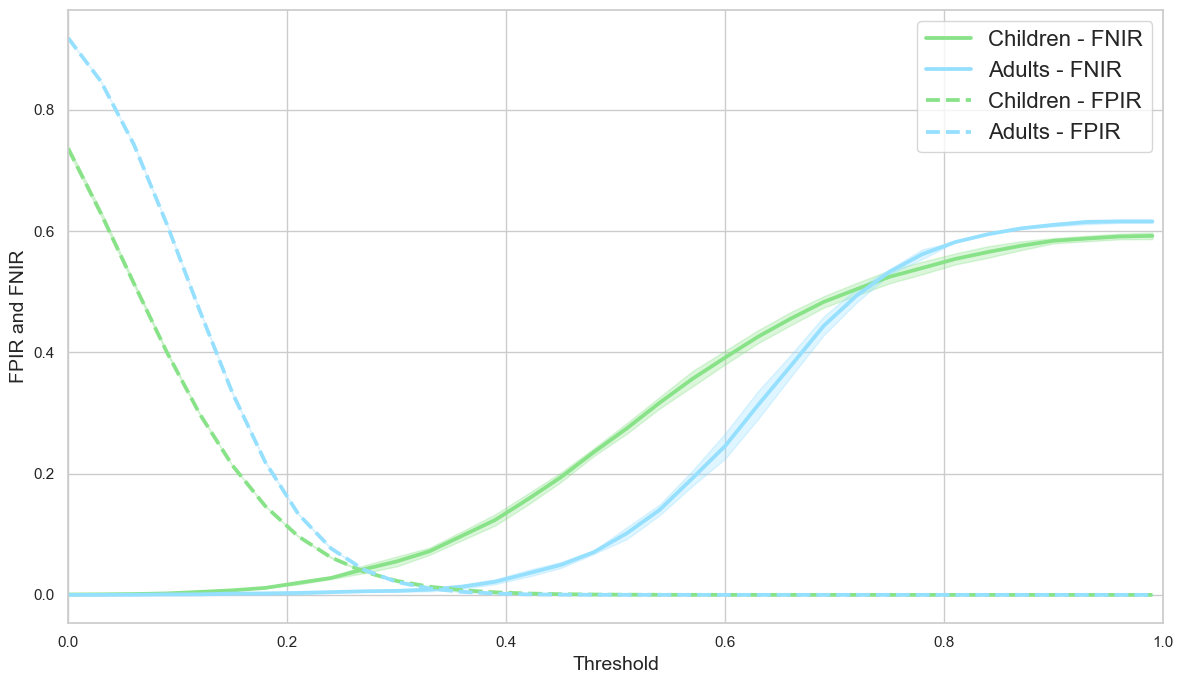

In [5]:

plot_threshold_metrics_ex_1_1_together_w_conf(df_all_threshold_x, 'AdaFace ex. 2.1', save_fig_path)

# then the threshold should be based on the childrens and that would be 0.163

# Stats

In [6]:

random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results, sim_mat_dict_all_magface_ex1_1 = evaluate_metrics_ex_1_1(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
)


len(sim_mat_c) 7571
len(sim_mat_c_reference_cols) 7571
len(sim_mat_c) 7571
len(sim_mat_c_enrolled_0) 2174
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref98.59761904761899
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref13.133333333333335
len(children_all)7817
len(sim_mat_c_non_enrolled_0) 2174
len(num_ids_c_non_enrolled) 2174
len(num_ids_c_reference) 3210
NEW FPD result:  1.0674871968087458
NEW FND result:  7.12411872883804
NEW GARBE result, GARBE close to 1 means more unfair:  0.14338128072915077
done
len(sim_mat_c) 7571
len(sim_mat_c_reference_cols) 7571
len(sim_mat_c) 7571
len(sim_mat_c_enrolled_0) 2181
enrolled_sim_mat.shape[0]2181
enrolled_sim_mat.shape[1]2181
M_d_set_len2181
neg_ref84.81269841269841
enrolled_sim_mat.shape[0]2113
enrolled_sim_mat.shape[1]2113
M_d_set_len2113
neg_ref11.500000000000002
len(children_all)7817
len(sim_mat_c_non_enrolled_0) 2181
len(num_ids_c_non_enrolled) 2181
len(num_ids_c_referenc

In [7]:
# Generate the LaTeX table
latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{0} & 0.045 & 0.006 & 0.039 & 0.041 & 1.067 & 7.124 & 0.143 & 0.270 \\
\textbf{1} & 0.039 & 0.005 & 0.038 & 0.042 & 1.099 & 7.145 & 0.144 & 0.270 \\
\textbf{2} & 0.044 & 0.006 & 0.038 & 0.042 & 1.094 & 7.329 & 0.145 & 0.270 \\
\textbf{3} & 0.039 & 0.007 & 0.039 & 0.043 & 1.090 & 5.227 & 0.130 & 0.270 \\
\textbf{4} & 0.043 & 0.005 & 0.038 & 0.041 & 1.097 & 9.268 & 0.154 & 0.270 \\
\textbf{5} & 0.042 & 0.007 & 0.036 & 0.041 & 1.122 & 5.686 & 0.135 & 0.270 \\
\textbf{6} & 0.037 & 0.006 & 0.039 & 0.042 & 1.086 & 6.063 & 0.137 & 0.270 \\
\textbf{7} & 0.042 & 0.003 & 0.038 & 0.042 & 1.121 & 12.034 & 0.162 & 0.270 \\
\textbf{8} & 0.034 & 0.004 & 0.037 & 0.042 & 1.137 & 8.420 & 0.152 & 0.270 \\
\textbf{9} & 0.039 & 0.006 & 0.037 & 0.042 & 1.133 & 7.024 & 0.145 & 0.270

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_67691/3395561937.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [8]:
latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{count} & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 \\
\textbf{mean} & 0.040 & 0.006 & 0.038 & 0.042 & 1.105 & 7.532 & 0.145 & 0.270 \\
\textbf{std} & 0.003 & 0.001 & 0.001 & 0.001 & 0.023 & 1.988 & 0.010 & 0.000 \\
\textbf{min} & 0.034 & 0.003 & 0.036 & 0.041 & 1.067 & 5.227 & 0.130 & 0.270 \\
\textbf{25%} & 0.039 & 0.005 & 0.037 & 0.041 & 1.091 & 6.304 & 0.139 & 0.270 \\
\textbf{50%} & 0.041 & 0.006 & 0.038 & 0.042 & 1.098 & 7.135 & 0.145 & 0.270 \\
\textbf{75%} & 0.043 & 0.006 & 0.038 & 0.042 & 1.122 & 8.147 & 0.150 & 0.270 \\
\textbf{max} & 0.045 & 0.007 & 0.039 & 0.043 & 1.137 & 12.034 & 0.162 & 0.270 \\
\bottomrule
\end{tabular} 
\end{table}



/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_67691/2945641856.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [9]:
df_all_results.to_csv('df_all_results_ada_2_1.csv', index=False)


# Stats

In [10]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_c'], df_all_results['FNIR_a'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 32.1717133329087
P-value: 1.331128686179853e-10


# Gemmer simscores

In [11]:

sim_mat_c_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_c_enrolled_iterations_all = np.concatenate(sim_mat_c_enrolled_iterations)
sim_mat_c_enrolled_iterations_all = pd.DataFrame(sim_mat_c_enrolled_iterations_all)
sim_mat_c_enrolled_iterations_all.to_csv('sim_mat_c_enrolled_iterations_all_ada_2_1.csv', index=False)
# Print the big array
print(len(sim_mat_c_enrolled_iterations_all))

sim_mat_a_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_a_enrolled_iterations_all = np.concatenate(sim_mat_a_enrolled_iterations)
sim_mat_a_enrolled_iterations_all = pd.DataFrame(sim_mat_a_enrolled_iterations_all)
sim_mat_a_enrolled_iterations_all.to_csv('sim_mat_a_enrolled_iterations_all_ada_2_1.csv', index=False)


# Print the big array
print(len(sim_mat_a_enrolled_iterations_all))


121256
41438


In [12]:

sim_mat_c_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_c_non_enrolled_iterations_all = np.concatenate(sim_mat_c_non_enrolled_iterations)
sim_mat_c_non_enrolled_iterations_all = pd.DataFrame(sim_mat_c_non_enrolled_iterations_all)
sim_mat_c_non_enrolled_iterations_all.to_csv('sim_mat_c_non_enrolled_iterations_all_ada_2_1.csv', index=False)
# Print the big array
print(len(sim_mat_c_non_enrolled_iterations_all))


sim_mat_a_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_a_non_enrolled_iterations_all = np.concatenate(sim_mat_a_non_enrolled_iterations)
sim_mat_a_non_enrolled_iterations_all = pd.DataFrame(sim_mat_a_non_enrolled_iterations_all)
sim_mat_a_non_enrolled_iterations_all.to_csv('sim_mat_a_non_enrolled_iterations_all_ada_2_1.csv', index=False)

# Print the big array
print(len(sim_mat_a_non_enrolled_iterations_all))


32751054
32371232


# loader sim scores

In [14]:
sim_mat_c_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_ada_2_1.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_ada_2_1.csv')).values.flatten()


In [15]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [16]:
mated_scores1 = sim_mat_a_enrolled_iterations_all_ada
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all_ada
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,41438.000000,3.237123e+07
1,Minimum,-0.055256,-3.017119e-01
2,Maximum,0.954128,6.414829e-01
3,Mean,0.620103,1.159417e-01
4,St. Dev.,0.121599,8.582371e-02
5,Skewness,-0.443453,1.996541e-01
6,Ex. Kurtosis,1.136858,2.257543e-01


In [17]:
mated_scores2 = sim_mat_c_enrolled_iterations_all_ada
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all_ada
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

,Statistic,Mated,Non-mated
0,Observations,121256.000000,3.275105e+07
1,Minimum,-0.059364,-3.752205e-01
2,Maximum,0.998875,9.998484e-01
3,Mean,0.519314,6.927152e-02
4,St. Dev.,0.167345,1.059971e-01
5,Skewness,-0.034546,3.285898e-01
6,Ex. Kurtosis,-0.171778,2.699031e-01


In [18]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

In [19]:
from DET_utils.DET_plots import *

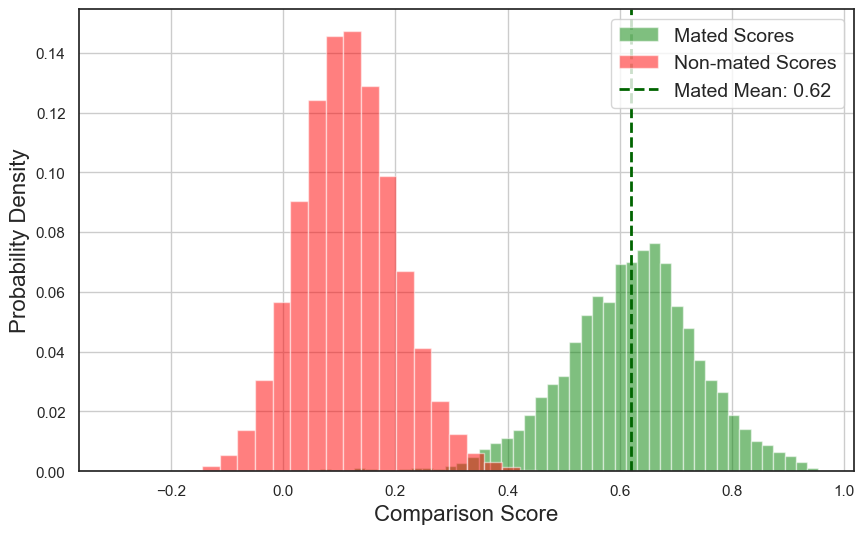

In [20]:

plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - MagFace ex. 2.1 ', save_fig_path=save_fig_path, gem_som = 'A1')


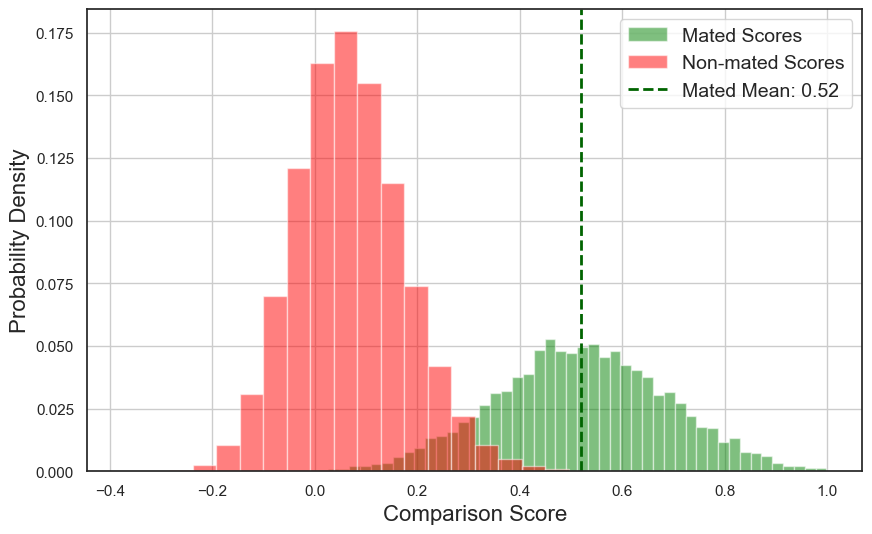

In [21]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - AdaFace ex. 2.1 ',save_fig_path=save_fig_path, gem_som = 'C1')


# DET curves


In [22]:
from DET_utils.DET_plots import *

In [23]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))


d' child = 4.7905
d' adult = 3.21297


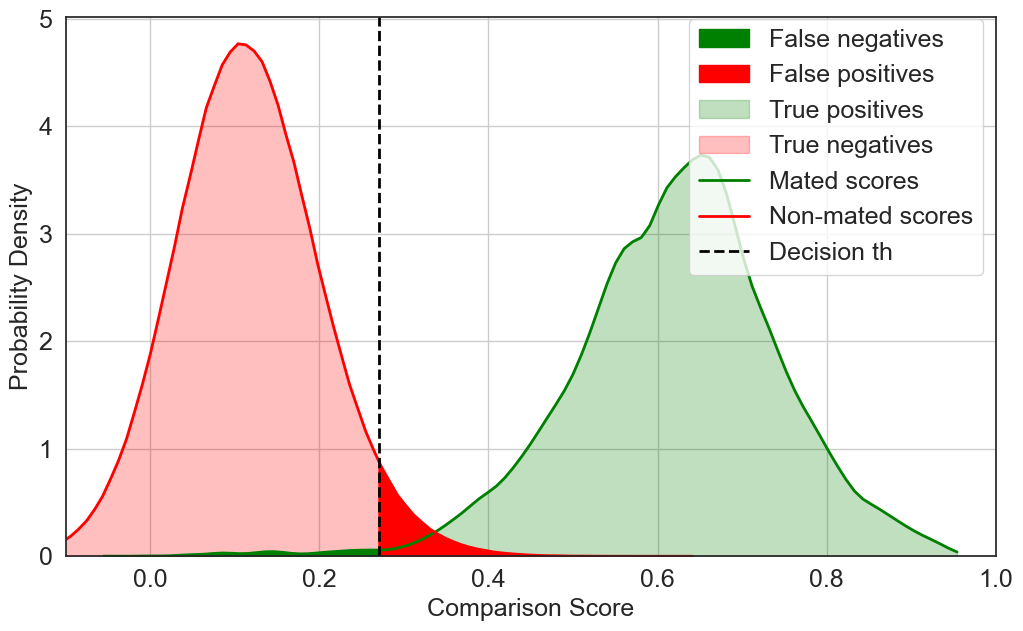

False Negatives: 0.84%


In [24]:
threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1, save_fig_path=save_fig_path, title='A2')

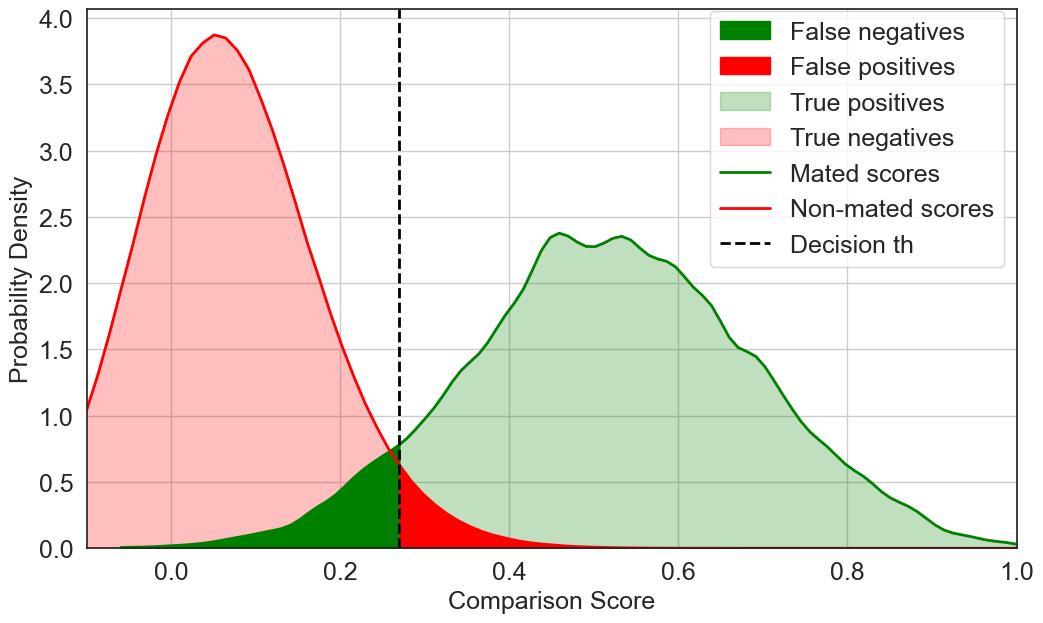

False Negatives: 7.31%


In [25]:
threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2, save_fig_path=save_fig_path, title='C2')

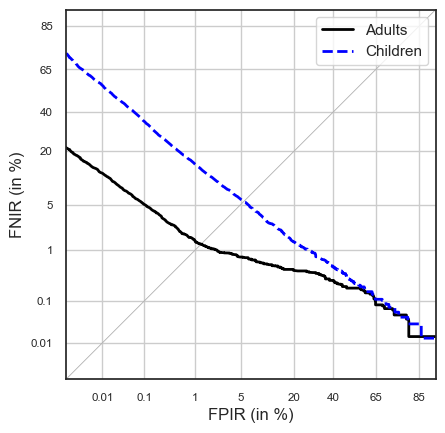

In [26]:

def DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, score_type= "similarity",title = 'Adults vs Children - MagFace ex. 2.2', save_fig_path= 'save_fig_path'):
    figure_size = (12,7)
    alpha_shade = 0.25
    alpha_fill = 1.0
    linewidth = 2
    legend_loc = "upper left"
    legend_anchor = (1.0, 1.02)
    legend_cols = 1
    legend_fontsize = 18
    label_fontsize = 18
    tick_fontsize = 18
    system_name1 = 'Adults'
    system_name2 = 'Children'

    det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True)#, plot_title=title)
    # det.x_limits = np.array([1e-5, .8])
    # det.y_limits = np.array([1e-5, .8])
    det.x_limits = np.array([1e-5, .9])
    det.y_limits = np.array([1e-5, .9])
    det.x_ticks = np.array([ 1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 65e-2, 85e-2, 95e-2])
    det.x_ticklabels = np.array(['0.01', '0.1', '1', '5', '20', '40', '65', '85', '95'])
    det.y_ticks = np.array([ 1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 65e-2, 85e-2, 95e-2])
    det.y_ticklabels = np.array([ '0.01', '0.1', '1', '5', '20', '40', '65', '85', '95'])

    det.create_figure()
    det.plot(tar=adjust_scores_for_DET(mated_scores1, score_type), non=adjust_scores_for_DET(nonmated_scores1, score_type), label=system_name1)
    det.plot(tar=adjust_scores_for_DET(mated_scores2, score_type), non=adjust_scores_for_DET(nonmated_scores2, score_type), label=system_name2)
    det.legend_on(loc="upper right")
    det.show()

DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, "similarity",'Adults vs Children - MagFace ex. 2.1', save_fig_path)
